In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define matplotlib defaults
plt.rcParams['figure.figsize']        = 8., 6.
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 14
plt.rcParams['ytick.labelsize']       = 14
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = False
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 18

pd.set_option('display.max_columns', None)

# CIFAR10

In [2]:
experiment_prefix = 'CIFAR10'
# Load results
df = pd.read_csv(f'../data/{experiment_prefix.lower()}.csv')
models = df.model.unique().tolist()
print(df.shape)
df.head()

(328, 10)


,id,model,num_correct,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
0,participant_0,ACGAN,171.0,0.145,0.09,0.20,0.445,158.68,81.60,77.08
1,participant_1,ACGAN,182.0,0.090,0.06,0.12,0.470,260.57,135.27,125.30
2,participant_2,ACGAN,151.0,0.245,0.17,0.32,0.425,200.78,95.15,105.63
3,participant_3,ACGAN,173.0,0.135,0.19,0.08,0.555,148.79,84.48,64.31
4,participant_4,ACGAN,191.0,0.045,0.05,0.04,0.505,180.31,89.37,90.94


In [3]:
columns = df.columns.tolist()[3:]
df_results = pd.DataFrame(columns=columns)
df_results_sem = pd.DataFrame(columns=columns)
for j, model in enumerate(models):
    model_res = df.loc[df['model'] == model]
    df_results.loc[model] = model_res.mean(numeric_only=True)
    df_results_sem.loc[model] = model_res.sem(numeric_only=True) # standard error of the mean

df_results

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
ACGAN,0.148200,0.115600,0.180800,0.467400,213.661200,100.458400,113.200800
BigGAN,0.386800,0.392800,0.380800,0.506000,283.532800,144.042000,139.490000
iDDPM-DDIM,0.399615,0.409615,0.389615,0.510000,267.805385,127.438077,140.368846
LOGAN,0.205600,0.207600,0.203600,0.502000,220.127200,114.258400,105.867200
LSGM-ODE,0.436852,0.456296,0.417407,0.519444,231.699259,117.097407,114.600741
MHGAN,0.336200,0.341200,0.331200,0.505000,267.292000,130.669200,136.621200
NVAE,0.130800,0.133600,0.128000,0.502800,240.262000,141.293600,98.967200
PFGMPP,0.435800,0.449600,0.422000,0.513800,243.312800,119.171600,124.141200
ReACGAN,0.335600,0.345200,0.326000,0.509600,246.828400,121.692000,125.134000
RESFLOW,0.088000,0.086000,0.090000,0.498000,199.384000,111.876400,87.506800


In [4]:
df_results_sem

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
ACGAN,0.012659,0.016156,0.020728,0.013605,17.469423,5.926306,13.564292
BigGAN,0.014026,0.021529,0.021039,0.016010,20.547506,9.516216,11.660313
iDDPM-DDIM,0.013344,0.022330,0.018584,0.015618,27.224202,12.253347,18.829690
LOGAN,0.019999,0.026251,0.021102,0.012933,14.700128,8.371466,6.756164
LSGM-ODE,0.009958,0.017728,0.021120,0.016763,16.712291,8.495524,8.774899
MHGAN,0.014998,0.020658,0.015962,0.010763,19.884665,9.104826,11.417831
NVAE,0.017644,0.024758,0.014652,0.010125,18.855748,16.957880,5.877459
PFGMPP,0.011014,0.025017,0.024256,0.022040,27.271176,11.673016,16.619929
ReACGAN,0.016061,0.026370,0.017185,0.015408,21.800662,10.934327,11.160029
RESFLOW,0.008441,0.011269,0.010456,0.006850,17.268649,13.828277,5.838051


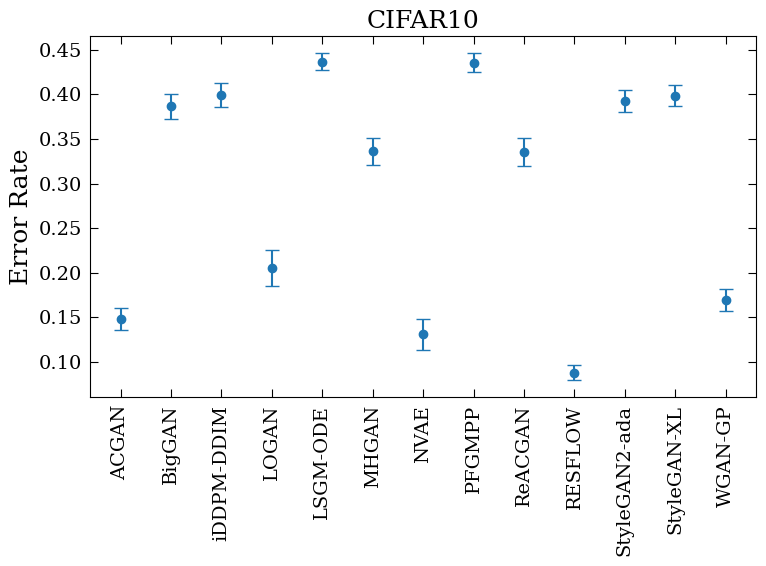

In [5]:
plt.errorbar(df_results.index, df_results.err_rt, yerr=df_results_sem.err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate")
plt.xticks(rotation=90)
plt.title(experiment_prefix.upper())
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

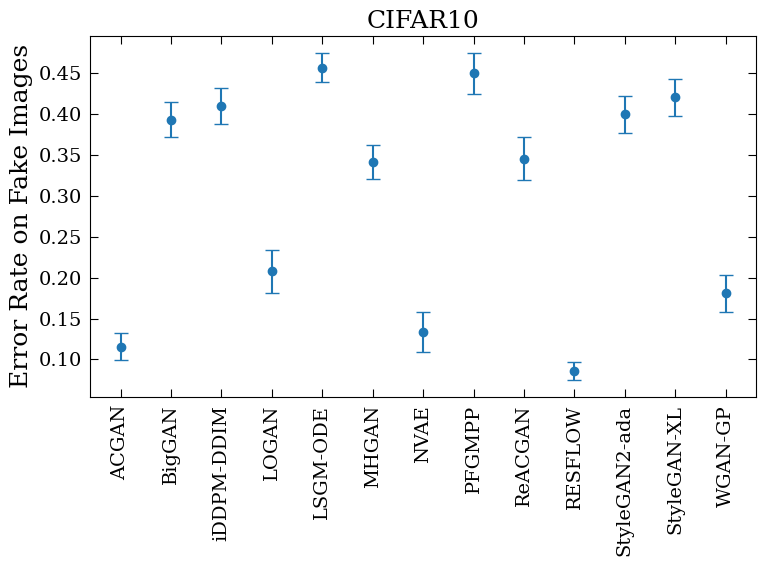

In [6]:
plt.errorbar(df_results.index, df_results.f_err_rt, yerr=df_results_sem.f_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Fake Images")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_f_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

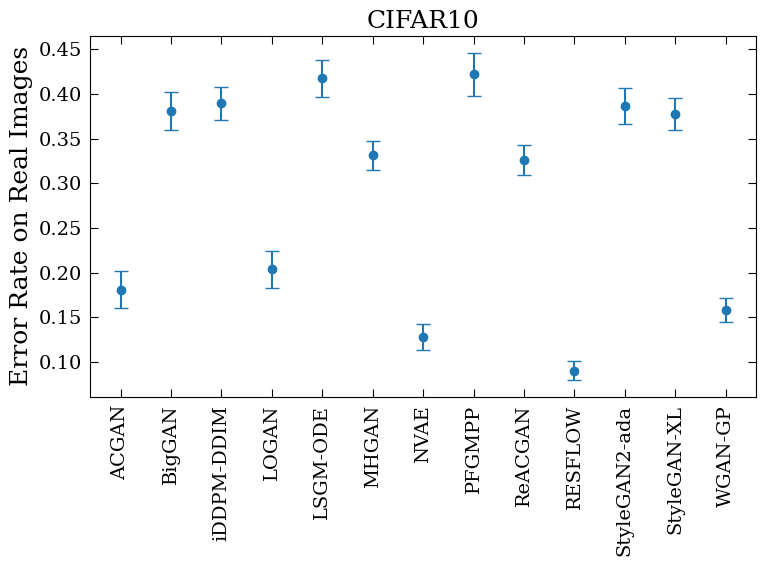

In [7]:
plt.errorbar(df_results.index, df_results.r_err_rt, yerr=df_results_sem.r_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Real Images")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_r_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()